In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Файлы скачаны по ссылке https://drive.google.com/drive/folders/1k0k3d-WO9kYqp0q9QG1WcmLn6mWWs0Zd  
[Датасет на Kaggle](https://www.kaggle.com/competitions/riiid-test-answer-prediction/data)

- row_id: (int64) ID строки в таблице.
- timestamp: (int64) время в миллисекундах между этим взаимодействием пользователя и завершением первого события от этого пользователя
- user_id: (int32) ID пользователя.
- content_id: (int16) ID для взаимодействия с пользователем.
- content_type_id: (int8) 0, если событием был вопрос, заданный пользователю, 1, если событием был просмотр пользователем лекции.
- task_container_id: (int16) Id для набора вопросов или лекций. Например, пользователь может просмотреть три вопроса подряд, прежде чем увидит пояснения к любому из них. Все эти три вопроса будут иметь общий идентификатор task_container_id.
- user_answer: (int8) ответ пользователя на вопрос, если таковой имеется. Считаем -1 как null, для лекций.
- answered_correctly: (int8) если пользователь ответил правильно. Считайте -1 как null, для лекций.
- prior_question_elapsed_time: (float32) Среднее время в миллисекундах, которое потребовалось пользователю, чтобы ответить на каждый вопрос из предыдущего набора вопросов, игнорируя все лекции между ними. Значение равно null для первого набора вопросов пользователя или лекции. Обратите внимание, что это среднее время, затраченное пользователем на решение каждого вопроса из предыдущего набора.
- prior_question_had_explanation: (bool) Значение используется совместно для всего набора вопросов и равно null для первого набора вопросов пользователя или лекции. Как правило, первые несколько вопросов, которые видит пользователь, были частью вступительного диагностического теста, в ходе которого он не получил никакой обратной связи.
Независимо от того, увидел ли пользователь объяснение и правильные ответы после ответа на предыдущий набор вопросов, игнорируя любые лекции между ними.

In [2]:
train = pd.read_csv("train.csv")

# Посмотрим на несколько первых записей
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [3]:
train.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


In [4]:
train.shape

(101230332, 10)

In [5]:
train.isna().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

In [6]:
train.isnull().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

Удаляем пропуски

In [3]:
train.dropna(inplace=True)

In [5]:
train.shape

(98878794, 10)

In [6]:
train.nunique()

row_id                            98878794
timestamp                         70897331
user_id                             393569
content_id                           13523
content_type_id                          1
task_container_id                    10000
user_answer                              4
answered_correctly                       2
prior_question_elapsed_time           3258
prior_question_had_explanation           2
dtype: int64

In [7]:
train.describe(include='all')

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
count,9.887879e+07,9.887879e+07,9.887879e+07,9.887879e+07,98878794.0,9.887879e+07,9.887879e+07,9.887879e+07,9.887879e+07,98878794
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89685560
mean,5.061586e+07,7.732632e+09,1.076747e+09,4.989951e+03,0.0,9.114148e+02,1.424894e+00,6.571448e-01,2.542381e+04,NaN
std,2.922180e+07,1.160779e+10,6.196978e+08,3.292287e+03,0.0,1.366479e+03,1.156243e+00,4.746636e-01,1.994815e+04,NaN
min,1.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,2.530876e+07,5.302152e+08,5.408447e+08,2.005000e+03,0.0,1.050000e+02,0.000000e+00,0.000000e+00,1.600000e+04,NaN
50%,5.061542e+07,2.688358e+09,1.071800e+09,4.980000e+03,0.0,3.850000e+02,1.000000e+00,1.000000e+00,2.100000e+04,NaN
75%,7.592127e+07,9.988412e+09,1.615742e+09,7.218000e+03,0.0,1.104000e+03,3.000000e+00,1.000000e+00,2.966600e+04,NaN


In [11]:
train['answered_correctly'].value_counts()

answered_correctly
1    64977687
0    33901107
Name: count, dtype: int64

In [10]:
train['user_answer'].value_counts()

user_answer
0    27989383
1    26912164
3    26025115
2    17952132
Name: count, dtype: int64

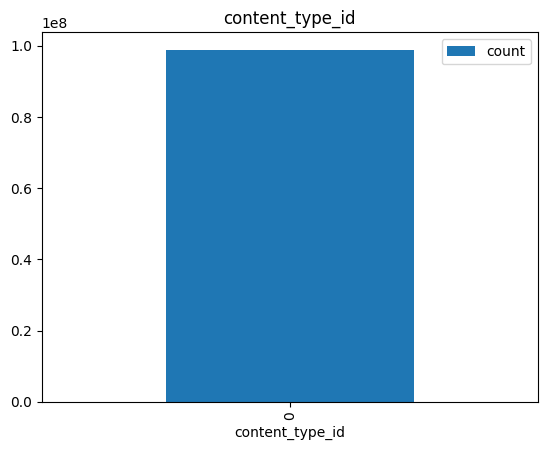

In [4]:
train['content_type_id'].value_counts().plot(kind='bar')
plt.title('content_type_id')
plt.legend()
plt.show()

Одни вопросы (0), нет событий - просмотров лекций (1)

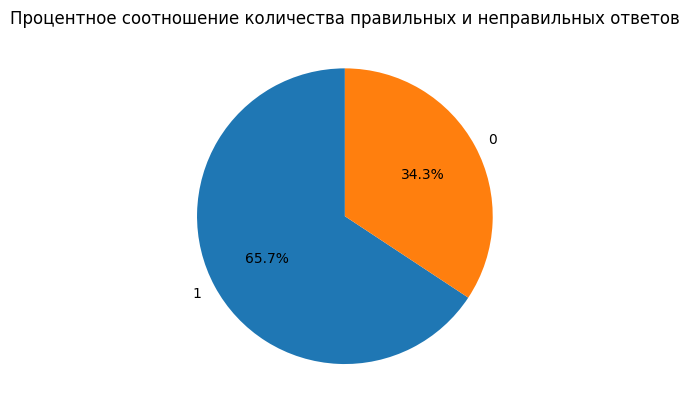

In [7]:
# Построение круговой диаграммы
train['answered_correctly'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
# startangle=90 — начальный угол, поворачивающий диаграмму для более удобного отображения
# autopct='%1.1f%%' — отображает процентные значения для каждой категории с точностью до одного десятичного знака
plt.ylabel('')  # Скрытие подписи оси Y
plt.title('Процентное соотношение количества правильных и неправильных ответов')
plt.show()

Больше верных ответов, чем неверных почти в два раза

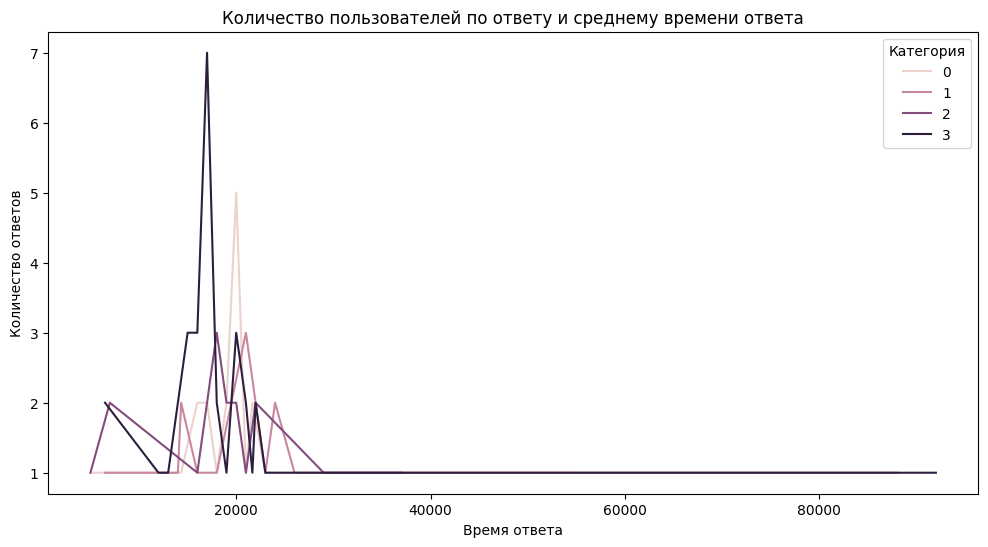

In [13]:
# Группируем данные по среднему времени, затраченному на ответ и ответам пользователей
counts = train[:100].groupby(['prior_question_elapsed_time', 'user_answer']).size().reset_index(name='count')

# Строим график
plt.figure(figsize=(12, 6))
sns.lineplot(data=counts, x='prior_question_elapsed_time', y='count', hue='user_answer')
plt.title("Количество пользователей по ответу и среднему времени ответа")
plt.xlabel("Время ответа")
plt.ylabel("Количество ответов")
plt.legend(title='Категория')
plt.show()

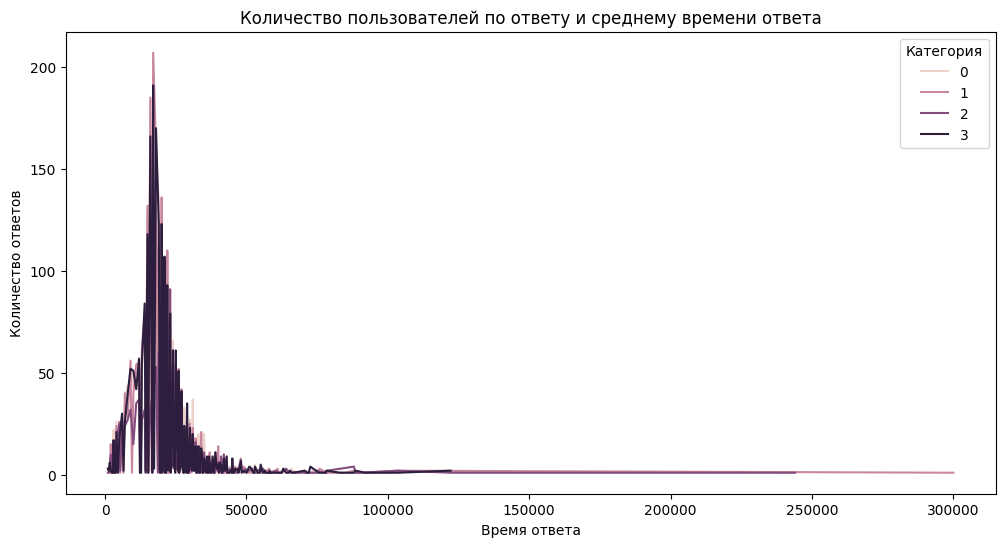

In [14]:
# Группируем данные по среднему времени, затраченному на ответ и ответам пользователей
counts = train[:10000].groupby(['prior_question_elapsed_time', 'user_answer']).size().reset_index(name='count')

# Строим график
plt.figure(figsize=(12, 6))
sns.lineplot(data=counts, x='prior_question_elapsed_time', y='count', hue='user_answer')
plt.title("Количество пользователей по ответу и среднему времени ответа")
plt.xlabel("Время ответа")
plt.ylabel("Количество ответов")
plt.legend(title='Категория')
plt.show()

Меньшее среднее время ответа у категорий ответов: 3 и 1. Их быстрее всего выбирают

C:\Users\Anastasia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


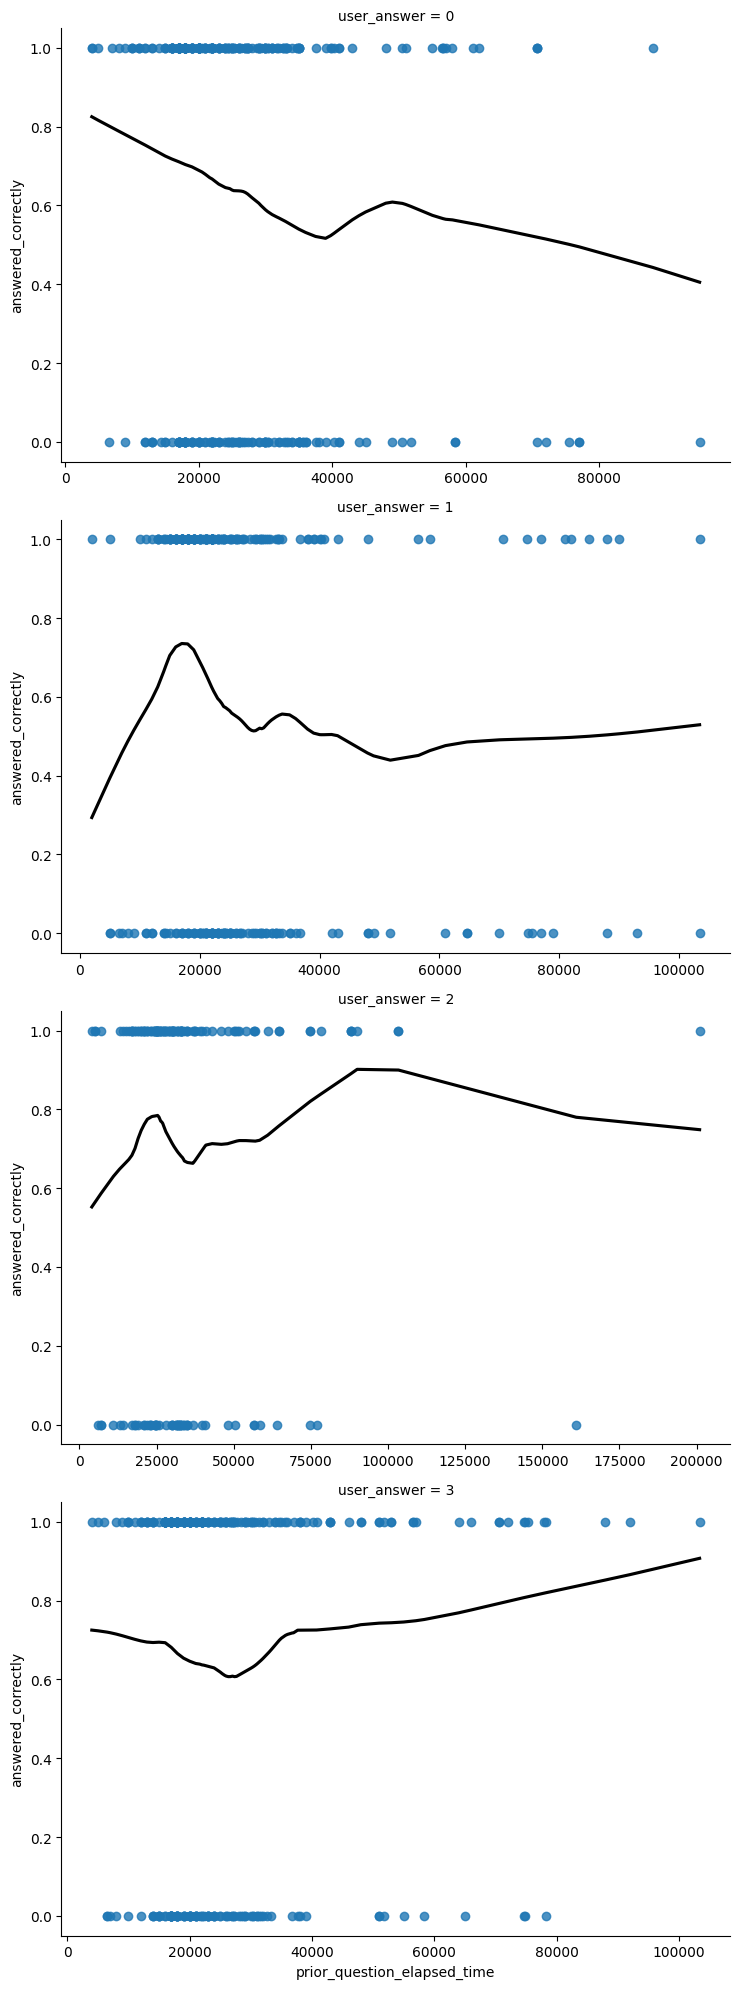

In [8]:
# тренд правильных ответов в каждой категории
sns.lmplot(x='prior_question_elapsed_time', y='answered_correctly', row='user_answer', data=train[:1000], lowess=True, 
           aspect=1.5, line_kws={'color' : 'black'}, facet_kws=dict(sharex=False, sharey=False));

Сколько в каждой категории овтетов правильных и неправильных ответов


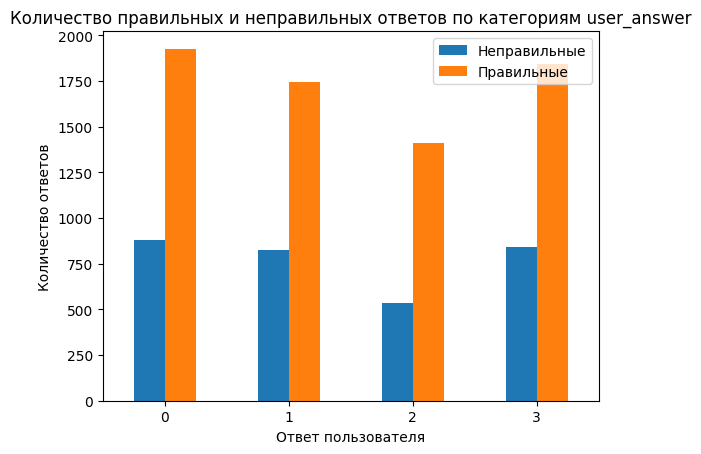

In [13]:
counts = train[10000:20000].groupby(['user_answer', 'answered_correctly']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=False)
plt.title('Количество правильных и неправильных ответов по категориям user_answer')
plt.xlabel('Ответ пользователя')
plt.ylabel('Количество ответов')
plt.xticks(rotation=0)
plt.legend(['Неправильные', 'Правильные'])
plt.show()

## lectures.csv: 
метаданные для лекций, которые просматривают пользователи по мере их продвижения в обучении  

- lecture_id: внешний ключ для столбца train content_id, если типом контента является lecture (1)  
- part: код категории высшего уровня для лекции  
- tag: тег содержит код для лекции. Значение тегов не будет указано, но этих кодов достаточно для объединения лекций в группы  
- type_of: краткое описание основной цели лекции  

In [14]:
lectures = pd.read_csv("lectures.csv")

# Посмотрим на несколько первых записей
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [6]:
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [7]:
lectures.shape

(418, 4)

In [13]:
lectures.isna().sum()

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

In [14]:
lectures.isnull().sum()

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

Пропусков нет, отлично

In [15]:
lectures.describe(include='all')

,lecture_id,tag,part,type_of
count,418.000000,418.000000,418.000000,418
unique,NaN,NaN,NaN,4
top,NaN,NaN,NaN,concept
freq,NaN,NaN,NaN,222
mean,16983.401914,94.480861,4.267943,NaN
std,9426.164660,53.586487,1.872424,NaN
min,89.000000,0.000000,1.000000,NaN
25%,9026.250000,50.250000,2.000000,NaN
50%,17161.500000,94.500000,5.000000,NaN
75%,24906.250000,140.000000,6.000000,NaN


In [16]:
lectures['tag'].value_counts()

tag
136    7
27     6
161    6
74     6
134    6
      ..
90     1
112    1
31     1
138    1
2      1
Name: count, Length: 151, dtype: int64

In [17]:
lectures['part'].value_counts()

part
5    143
6     83
2     56
1     54
7     32
4     31
3     19
Name: count, dtype: int64

In [18]:
lectures['type_of'].value_counts()

type_of
concept             222
solving question    186
intention             7
starter               3
Name: count, dtype: int64

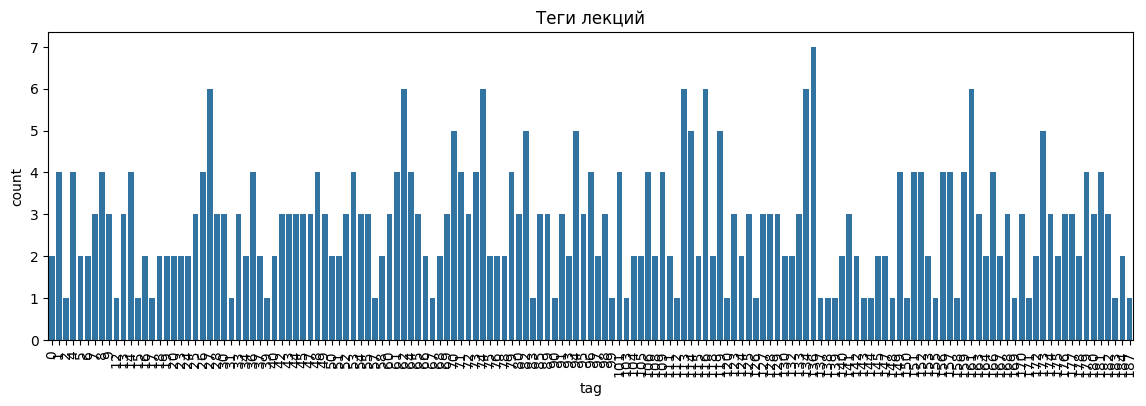

In [17]:
plt.figure(figsize=(14,4))
plt.title('Теги лекций')
sns.countplot(data=lectures, x=lectures['tag'])
plt.xticks(rotation=90)
plt.show()

In [21]:
top_tags = lectures['tag'].value_counts().head(10)
top_tags

tag
136    7
27     6
161    6
74     6
134    6
116    6
113    6
62     6
114    5
70     5
Name: count, dtype: int64

Показали самые частые топ десять тегов лекций

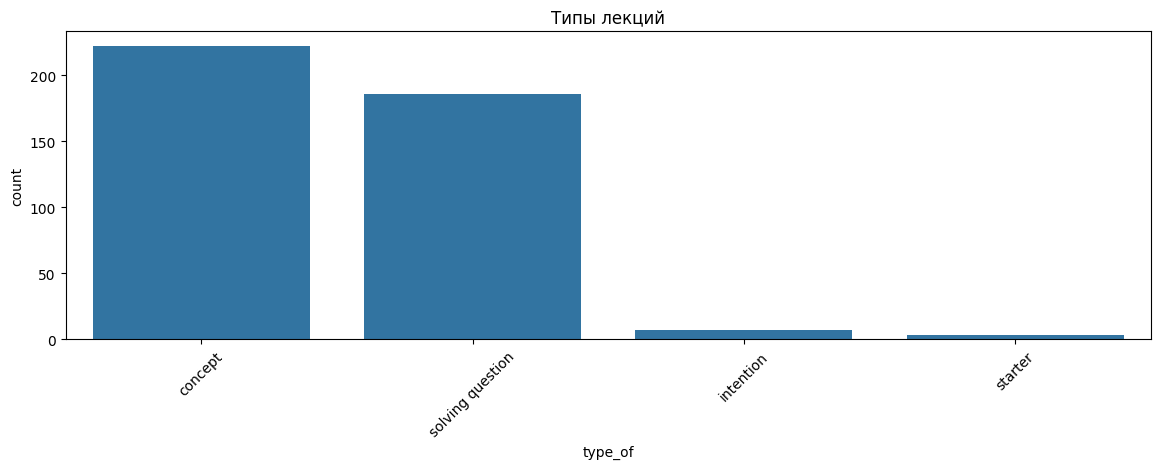

In [18]:
plt.figure(figsize=(14,4))
plt.title('Типы лекций')
sns.countplot(data=lectures, x=lectures['type_of'])
plt.xticks(rotation=45)
plt.show()

Больше всего лекций типа concept

## questions.csv: 
метаданные для ответов на вопросы, задаваемые пользователям.

- question_id: внешний ключ для столбца train content_id, если типом контента является question (0)  
- bundle_id: id код, по которому вопросы подаются вместе  в группе
- correct_answer: ответ на вопрос. Можно сравнить со столбцом train user_answer, чтобы проверить, был ли пользователь прав
- part: соответствующий раздел теста TOEIC  
- tags: один или несколько подробных кодов тегов для вопроса. Значение тегов не будет указано, но этих кодов достаточно для объединения вопросов в группы  

In [22]:
questions = pd.read_csv("questions.csv")

# Посмотрим на несколько первых записей
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [9]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [10]:
questions.shape

(13523, 5)

In [21]:
questions.isna().sum()

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

In [22]:
questions.isnull().sum()

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

In [23]:
questions.dropna(inplace=True)

In [24]:
questions.shape

(13522, 5)

In [25]:
questions.describe(include='all')

,question_id,bundle_id,correct_answer,part,tags
count,13522.000000,13522.000000,13522.000000,13522.000000,13522
unique,NaN,NaN,NaN,NaN,1519
top,NaN,NaN,NaN,NaN,8
freq,NaN,NaN,NaN,NaN,738
mean,6760.758024,6760.268895,1.455258,4.264828,NaN
std,3903.941125,3903.900695,1.149740,1.652547,NaN
min,0.000000,0.000000,0.000000,1.000000,NaN
25%,3380.250000,3378.750000,0.000000,3.000000,NaN
50%,6760.500000,6759.000000,1.000000,5.000000,NaN
75%,10141.750000,10140.000000,3.000000,5.000000,NaN


In [25]:
questions['question_id'].value_counts()

question_id
0        1
9032     1
9008     1
9009     1
9010     1
        ..
4510     1
4511     1
4512     1
4513     1
13522    1
Name: count, Length: 13522, dtype: int64

In [26]:
questions['correct_answer'].value_counts()

correct_answer
0    3716
3    3544
1    3478
2    2784
Name: count, dtype: int64

In [27]:
# вспомним какое распределение категорий ответов было в таблице train
df = questions.copy()
df.rename(columns={'question_id': 'content_id'}, inplace=True)
df_train = train[['content_id', 'user_answer']]
merged = pd.merge(df, df_train, on='content_id' , how='inner')
merged
# merged['user_answer'].value_counts()

MemoryError: Unable to allocate 754. MiB for an array with shape (98878794,) and data type int64

In [27]:
questions['part'].value_counts()

part
5    5511
2    1647
3    1562
4    1439
6    1211
7    1160
1     992
Name: count, dtype: int64

In [28]:
questions['tags'].value_counts()

tags
8                 738
73                617
53                523
1                 413
96                373
                 ... 
157 144 81          1
157 144 38          1
106 169 162 81      1
157 169 162 81      1
157 169 92          1
Name: count, Length: 1519, dtype: int64

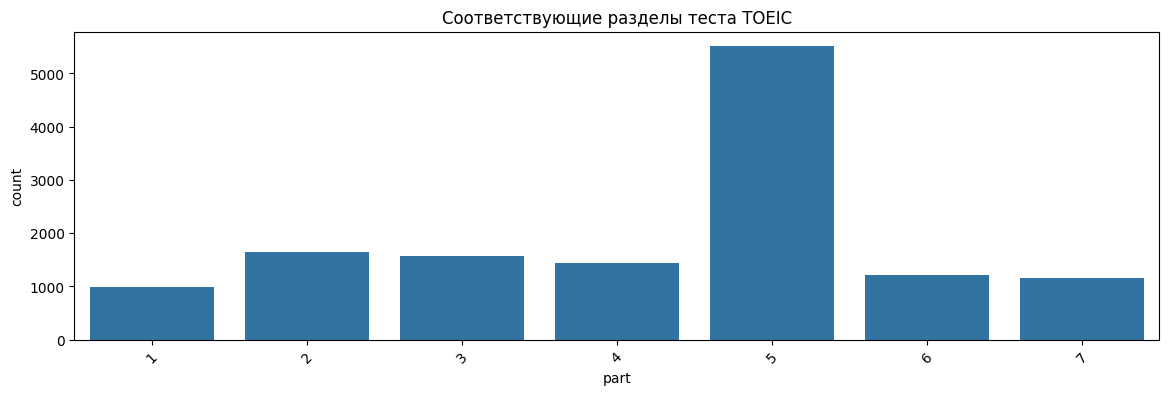

In [28]:
plt.figure(figsize=(14,4))
plt.title('Соответствующие разделы теста TOEIC')
sns.countplot(data=questions, x=questions['part'])
plt.xticks(rotation=45)
plt.show()